<a href="https://colab.research.google.com/github/nojihun/save/blob/main/AI_05_%EB%85%B8%EC%A7%80%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from google.colab import files
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
df = pd.read_csv('vgames2.csv')
df = df.dropna() #결측치 제거

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.</p>
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.</p>
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [3]:
def my_1(x):# 매출액서 K 와 M을 빼내기 위한 함수
  val= x.find('K')
  val2=x.find('M')
  if val != -1:
    x = x.replace('K','')
    x = float(x)
    x = x*1000
  elif val2 != - 1:
    x=x.replace('M','')
    x=float(x)
    x = x*1000000
  else:
    x = float(x)
  return x

df['NA_Sales']= df['NA_Sales'].apply(my_1)
df['EU_Sales']= df['EU_Sales'].apply(my_1)
df['JP_Sales']= df['JP_Sales'].apply(my_1)
df['Other_Sales']= df['Other_Sales'].apply(my_1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.head(12)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [5]:
 # 연도에 오류가나서 제대로 표시 되지 않은 데이터들을 제거
de = df[df['Year']<=1899].index
df = df.drop(de)


In [6]:
da = df[df['NA_Sales'] >= 20]#매우 잘팔린 게임들
db = df[df['EU_Sales']>=20]
dc= df[df['JP_Sales']>=20]
dd = df[df['Other_Sales']>=20]
de = pd.concat([da,db,dc,dd])
de = de.drop_duplicates(['Name'])
de

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,11,Ford Racing,PS,2001.0,Racing,Empire Interactive,480000.00,330000.00,0.00,0.06
45,46,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60000.00,0.08,0.16,0.03
447,448,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,580000.00,0.47,0.01,0.10
458,459,F1 2010,PS3,2010.0,Racing,Codemasters,250000.00,0.76,0.08,0.27
577,578,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550000.00,1.94,2.23,0.15
...,...,...,...,...,...,...,...,...,...,...
16074,16075,The Black Eyed Peas Experience,Wii,2011.0,Misc,Ubisoft,0.39,0.20,0.00,60000.00
16141,16142,World Championship Poker: Featuring Howard Led...,PS2,2006.0,Misc,Oxygen Interactive,0.82,0.64,0.00,220000.00
16143,16144,DJ Hero,Wii,2009.0,Misc,Activision,0.47,0.23,0.00,70000.00
16412,16413,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006.0,Misc,Konami Digital Entertainment,0.14,0.05,0.07,10000.00


In [7]:
de = df[df['NA_Sales'] >= 100].index #대박이 나서 평균에 큰 영향을 미치는 것들을 빼는 건데... 이게 맞나??
df = df.drop(de)
de = df[df['EU_Sales']>=100].index
df = df.drop(de)
de = df[df['JP_Sales']>=100].index
df = df.drop(de)
de = df[df['Other_Sales']>=100].index
df = df.drop(de)

In [8]:
df=df.drop(['Unnamed: 0'], axis ='columns' )
df = df.reset_index()
df=df.drop(['index'], axis ='columns' )
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15692,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15693,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15694,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15695,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [9]:
df_n = df[df['Year']>=2010]

In [38]:
# 장르와 지역

df1= pd.DataFrame(df.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df1= df1.T
df1 = df1.reset_index()
df1

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
1,EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
2,JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
3,Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


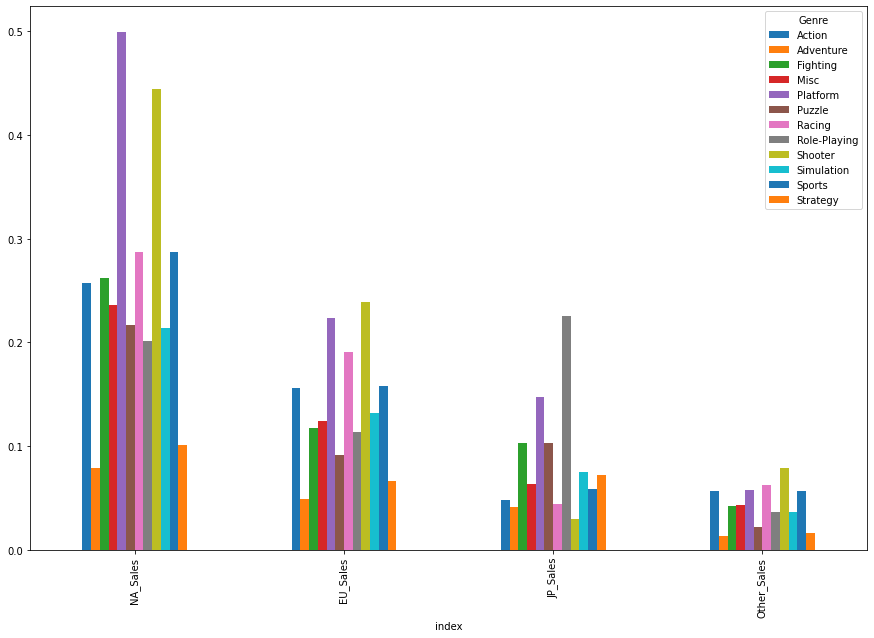

In [39]:
df1.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [12]:
from scipy.stats import chi2_contingency

In [13]:
df1 = df1.set_index('index')


In [14]:
chi2_contingency(df1)

(0.4715418107758973,
 1.0,
 33,
 array([[0.254375  , 0.08918508, 0.25767674, 0.22982697, 0.45581255,
         0.21275491, 0.28698809, 0.28334914, 0.38866524, 0.2246901 ,
         0.27534873, 0.12581004],
        [0.13705237, 0.04805121, 0.13883129, 0.12382636, 0.24558306,
         0.11462827, 0.15462368, 0.15266309, 0.20940538, 0.12105872,
         0.14835262, 0.06778404],
        [0.08345379, 0.02925929, 0.08453701, 0.07540022, 0.14954018,
         0.06979932, 0.09415329, 0.09295945, 0.12751091, 0.07371495,
         0.09033472, 0.04127499],
        [0.04317182, 0.01513625, 0.04373219, 0.0390056 , 0.07735925,
         0.03610818, 0.04870683, 0.04808923, 0.06596319, 0.03813379,
         0.04673143, 0.02135213]]))

결론 p값이 1이니 지역에 따른 장르의 선호도가 다르다고 볼 수 없다.

In [ ]:
df2= pd.DataFrame(df.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df2["sum"] = df2[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df2 = pd.DataFrame(df2['sum'])
df2 = df2.reset_index()
df2 = df2.pivot_table(index = 'Year', columns = 'Genre', values = 'sum')
df2= df2.fillna(0)
header = list(df2.columns.values)
df2= df2.reset_index()
df2

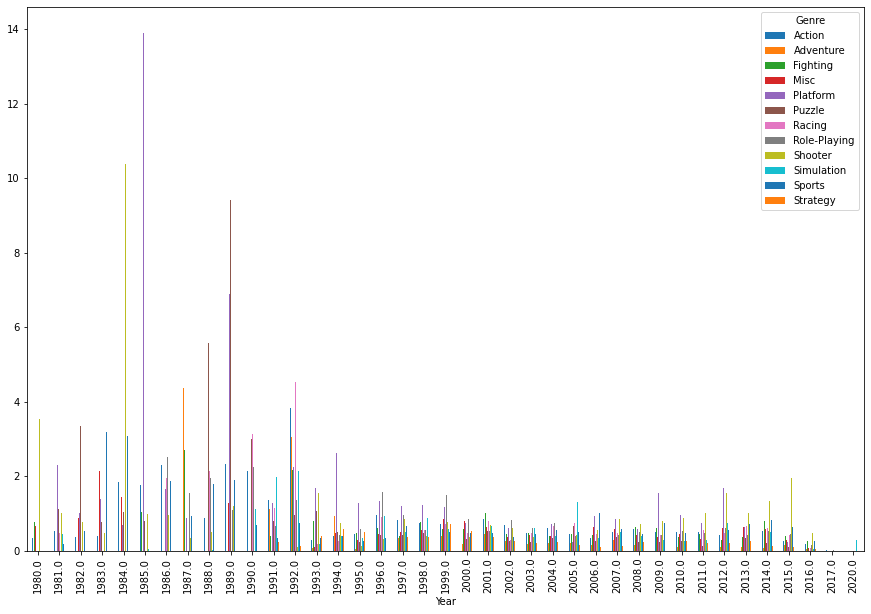

In [16]:
df2.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [17]:
df2 = df2.set_index('Year')

In [18]:
chi, p, n, static = chi2_contingency(df2)
chi, p, n

(305.7536568971036, 0.9999903669560812, 418)

In [19]:
df2 = df2.reset_index()

In [20]:
df_2 = df2[df2['Year']>=2010]
df_2

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
30,2010.0,0.517623,0.109467,0.372000,0.449267,0.969655,0.252500,0.599464,0.537789,0.872597,0.275897,0.471823,0.265102
31,2011.0,0.506537,0.149245,0.450217,0.306742,0.758889,0.125526,0.553333,0.466848,1.002247,0.278889,0.453983,0.197111
32,2012.0,0.434080,0.103509,0.293333,0.616111,1.685455,0.158182,0.487586,0.609600,1.561522,0.742778,0.569623,0.222000
33,2013.0,0.748811,0.111525,0.379474,0.629750,0.638824,0.333333,0.673077,0.421970,1.005965,0.482222,0.721373,0.258889
34,2014.0,0.536685,0.080946,0.788947,0.578780,0.887000,0.214286,0.618889,0.518182,1.332727,0.503636,0.819245,0.121250
35,2015.0,0.271388,0.153654,0.388000,0.302895,0.228333,0.115000,0.416842,0.437568,1.944706,0.374000,0.627377,0.107059
36,2016.0,0.171739,0.054242,0.275000,0.064118,0.208000,0.000000,0.085263,0.168462,0.488571,0.043333,0.268889,0.052000
37,2017.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000
38,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000,0.000000,0.000000


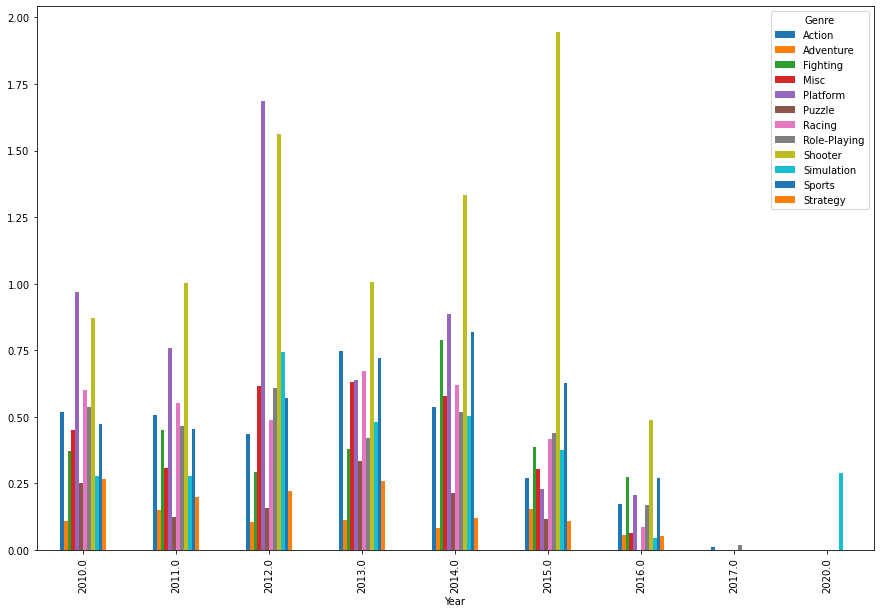

In [21]:
df_2.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [22]:
df_2 = df_2.set_index('Year')
chi, p, n, static = chi2_contingency(df_2)
chi, p, n


(7.259210307995383, 1.0, 88)

In [23]:
df3= pd.DataFrame(df.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean())
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,0.688421,0.041404,0.000000,0.007105
3DO,0.000000,0.000000,0.033333,0.000000
3DS,0.145925,0.108503,0.190166,0.023514
DC,0.104423,0.032500,0.164615,0.005192
DS,0.178340,0.089598,0.080736,0.027851
GB,1.146277,0.451809,0.869468,0.080532
GBA,0.219895,0.087668,0.053926,0.008867
GC,0.245405,0.070598,0.040000,0.009440
GEN,0.741154,0.212308,0.092692,0.034231


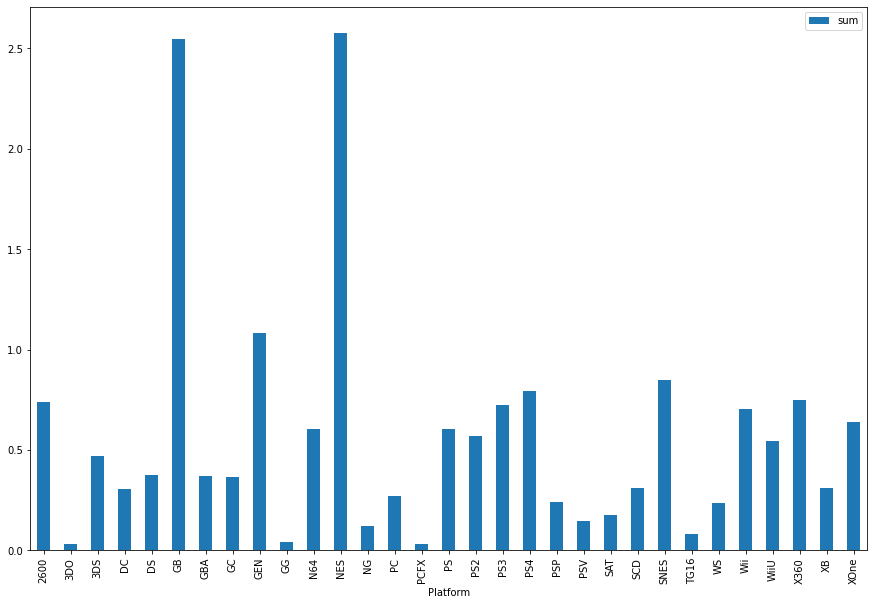

In [24]:
header = list(df3.columns.values)
df3["sum"] = df3[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df3= df3.reset_index()

df3.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [25]:
df_3 = pd.DataFrame(df_n.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #최근 10년치 데이터들만
df_3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,0.145925,0.108503,0.190166,0.023514
DS,0.112505,0.052970,0.042586,0.015192
PC,0.082864,0.144027,0.000000,0.034228
PS2,0.044419,0.038372,0.018140,0.028605
PS3,0.255235,0.252676,0.066948,0.102042
PS4,0.274385,0.353218,0.042114,0.124416
PSP,0.017593,0.015123,0.083786,0.009012
PSV,0.037500,0.038207,0.051364,0.019874
Wii,0.272650,0.145046,0.031889,0.039954


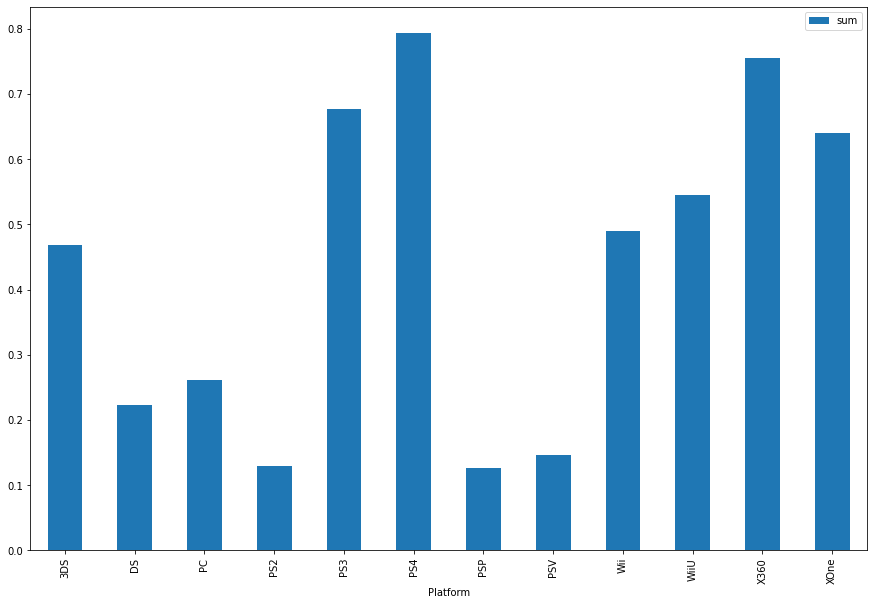

In [26]:
header = list(df_3.columns.values)
df_3["sum"] = df_3[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df_3= df_3.reset_index()

df_3.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [27]:
F_statistic, pVal = stats.f_oneway( df_3['NA_Sales'],df_3['EU_Sales'], df_3['JP_Sales'],df_3['Other_Sales'])
pVal

0.0004454733792675141

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
model = ols('NA_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,157.186881,14.289716,21.733395,1.248314e-44
Residual,15685.0,10312.894386,0.657500,NaN,NaN


In [30]:
model = ols('NA_Sales ~ C(Genre)*C(Platform)', df).fit()
anova_lm(model, typ = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 330, but rank is 259
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,9.618224,1.0,15.323381,9.097822e-05
C(Genre),22.461849,11.0,3.253213,1.859129e-04
C(Platform),60.123082,30.0,3.192859,9.154872e-09
C(Genre):C(Platform),414.525145,330.0,2.001228,5.209951e-19
Residual,9669.454920,15405.0,NaN,NaN


결과는 Genre 에 따라 매출이 달라지고 platform에 따라 매출이 달라지낟. 그리고 게임의 장르와 플랫폼이 두개가 상호작용을 한다.

장르와 수입들 중에서 수입들로 scaater 그래프를 그리고  k-means 를 한다면 지역에 따라 장르가 바뀌지 않는다는 것을 더 잘 보여 줄수 있지 않을까. 